# Step1: Scrape Tweets

### Use Tweepy API to search tweets. Only return a few days' tweets due to Twitter API limitations

In [1]:
import tweepy

In [ ]:
# Specify the account credentials in the following variables:
consumer_key = '6LH2LIMPGNWMxNE2a6LfILp7i'
consumer_secret = '0eWTMNdazgVNCgt1lRCQapeN8O54GeonyGHREyebYQs7dL3upn'
access_token = '78610351-PaQIZu59zNjgIX7OeaKlU1Jr9LMqCTxVmGa7vxLZM'
access_token_secret = 'J32gDj3Vdi3bjB0IbisO0IoCKWadDogVeGgZSyv510jZ4'


# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True) # 'wait on rate limit' is to avoid request failure

In [ ]:
con=0
for tweet in tweepy.Cursor(api.search, q={"#currys"}, count=10,
                           lang="en", since="2018-03-10").items():
    con+=1
    print("\n-----\n"+str(con)+"\n"+str(tweet.created_at), tweet.text+ "\n-----\n")
    with open('currys.txt','a',encoding="utf-8") as f:
        f.write(tweet.text)
        f.write('\n')

### Use GetOldTweets3, a tool developed by some random guy in github, we can get old tweets. But much slower.

In [ ]:
import GetOldTweets3 as got

In [ ]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#currys')\
                                           .setSince("2018-03-10")\
                                           .setUntil("2019-03-10")\
                                           .setMaxTweets(10000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)[0]
print(tweet.text)

In [ ]:
for i in range(10000):
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)[i]
    print(i)
    with open('currys.txt','a',encoding="utf-8") as f:
        f.write(tweet.text)
        f.write('\n')

### Use Selenium to get tweets. Still slow because we have to wait for loading.

In [63]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [64]:
import re

The url below is the most relevant one I found. This page is latest @currys. Because:  
1) #currys contains too much useless information such a promotion ads  
2) AO review can only be reached via @ao. #ao is uselss stuff. So to make it consistent.

In [65]:
# launch the browser
#aug2017 - 100 to 200 pgs
browser = webdriver.Chrome()
url = u'https://twitter.com/search?f=tweets&vertical=default&q=%23argos&l=en&src=typd'
browser = webdriver.Chrome()
browser.get(url)

# Let the Tweets load
time.sleep(1)

# Find the body of the HTML page
body = browser.find_element_by_tag_name('body')

# Keep scrolling down using a simulation of the PAGE_DOWN button
for _ in range(100):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)

# Get the tweets by their class (similar to Beautifulsoup's find())
tweets = browser.find_elements_by_class_name('tweet-text')
# Print Tweets
count=0
for tweet in tweets:
    count+=1
    print(count)
    
    review=re.sub('\n',' ',tweet.text) # make each tweet a single paragraph so we can count later
    print(review)
    with open('argos_filter.txt','a',encoding="utf-8") as f:
        f.write(review)
        f.write('\n')

1
#CFLCombine results tracker https://3downnation.com/2019/03/23/cfl-combine-results-tracker/ … #AlsMTL #Alouettes #MontreALS #Redblacks #RNation #Ticats #Argos #Bombers #Riders #CalStampeders #Calgary #Eskimos #BCLions #CFL
2
Knockin' at the Door: Argos-Ticats game moved #toronto #argos #bhivenectar #bhivechat #bhivelabs #bhive
3
I dislike the Argos more than tapioca pudding and butter parts - but the Argos fleet of QBs is charasmatic and friendly AF.  As a human I'm fuqn pulling for them all.  #Argos
4
#Argos - History Of The Ancient #Greek City #Travel #Greece #tourism #FrizeMedia http://www.global-travel-guide.com/argos.html  via @Charlesfrize
5
Black ready to transition into new role with Argos (via @d_morassutti) https://tipofthetower.com/2019/03/22/toronto-argonauts-matt-black-ready-transition-new-role-after-retirement/ … #CFL #Argos
6
The CFL grants a wish for the Arkells https://www.thespec.com/sports-story/9235681-the-cfl-grants-a-wish-for-the-arkells/#.XJY5JNJa1-E.twitter … 

# Step 2: Frequency analysis, wordcloud

### Purpose: find the words customers mentioned most frequently, so we can gain some insight on what customers care about

In [1]:
import nltk
import re
from wordcloud import WordCloud

In [2]:
# treat the text as bag of words
with open('argos_com.txt','r',encoding='utf-8') as f:
    argos=f.read()

Clean the data -- url, non-English character

In [3]:
# clean url
argos_clean = re.sub("(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]", "", argos)             

In [4]:
# clean non-English characters
argos_clean1 = re.sub('[^A-Za-z]',' ',argos_clean)

##### Create stop words based on frequency

In [5]:
# create stopwords list for this case, keep updating according to output
stopword_freq=["I","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you",
           "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
           "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
           "their", "theirs", "themselves", "what", "which", "who", "whom", "this",
           "that", "these", "those", "am", "is", "are", "was", "were", "be", "been",
           "being", "have", "has", "had", "having", "do", "does", "did", "doing", 
           "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
           "of", "at", "by", "for", "with", "about", "against", "between", "into",
           "through", "during", "before", "after", "above", "below", "to", "from",
           "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", 
           "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
           "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
           "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
           "will", "just", "don", "should", "now","via","smart","get","black","entertainment","ireland","london","england",
              "scotland","wales","londonislovinit","one","gb","marked","white","new","today","bundle","still","day","back",
              "buy","selected","logik","days","told","uk","home","never","ve","core","even","would","half","got","gold",
              "win","warriors","take","red","go","month","know","lg","jvc","ever","bought","friday","extra","shop",
              "tb","built","week","range","data","re","people","last","rt","need","stephen","night","want"]

In [6]:
# tokenize
tokens = nltk.word_tokenize(argos_clean1)
# change all tokens into lower case
tokens = [w.lower() for w in tokens]

In [7]:
# remove stop words
filtered_words = [word for word in tokens if word not in stopword_freq]
count=0
for i in filtered_words:
    count+=1
count

115096

In [8]:
# display the most frequent 25 words that has more than 1 letter
freq_words=nltk.FreqDist(w for w in filtered_words if len(w)>1)
print(freq_words.most_common(100))

[('argos', 8719), ('cfl', 2164), ('de', 831), ('discount', 806), ('toronto', 650), ('shopping', 555), ('retail', 508), ('free', 482), ('giftcards', 475), ('ticats', 429), ('giftcard', 390), ('torontoargos', 389), ('en', 379), ('online', 378), ('redblacks', 370), ('great', 358), ('high', 351), ('que', 350), ('join', 345), ('sell', 344), ('riders', 344), ('street', 341), ('group', 339), ('la', 331), ('cards', 327), ('boots', 325), ('coach', 314), ('game', 311), ('season', 305), ('alsmtl', 298), ('bclions', 289), ('job', 285), ('hiring', 274), ('christmas', 266), ('year', 263), ('head', 254), ('el', 249), ('team', 238), ('way', 237), ('bombers', 228), ('argoscareers', 224), ('like', 220), ('jobs', 220), ('bhivenectar', 218), ('bhivechat', 218), ('bhivelabs', 218), ('bhive', 218), ('trestman', 216), ('alouettes', 213), ('time', 211), ('growyourcareer', 206), ('cflfa', 206), ('someone', 202), ('argonauts', 200), ('selling', 190), ('tesco', 186), ('facebook', 186), ('miss', 186), ('love', 18

### Create word cloud

In [13]:
# delete currys for word cloud cuz they dont contain information
stopword_cloud=stopword_freq+["currys","pc","world","curryspcworld"]

In [14]:
# use this liine if we use mask
from scipy.misc import imread

In [15]:
# use this line if we use customed color
import numpy as np

In [16]:
#bg_pic = imread('uk.png')
wc = WordCloud( width=2000, height=1200, margin=2,background_color="white", max_words=100, 
               stopwords=stopword_cloud)
wc.generate(argos_clean1)




In [17]:
# design color function
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(1,40))


Some interesting words and patterns show up.  
1) It seems that a large proportion of tweets are promotions via LatestDeal  
2) TV seems to be star product

(-0.5, 1999.5, 1199.5, -0.5)

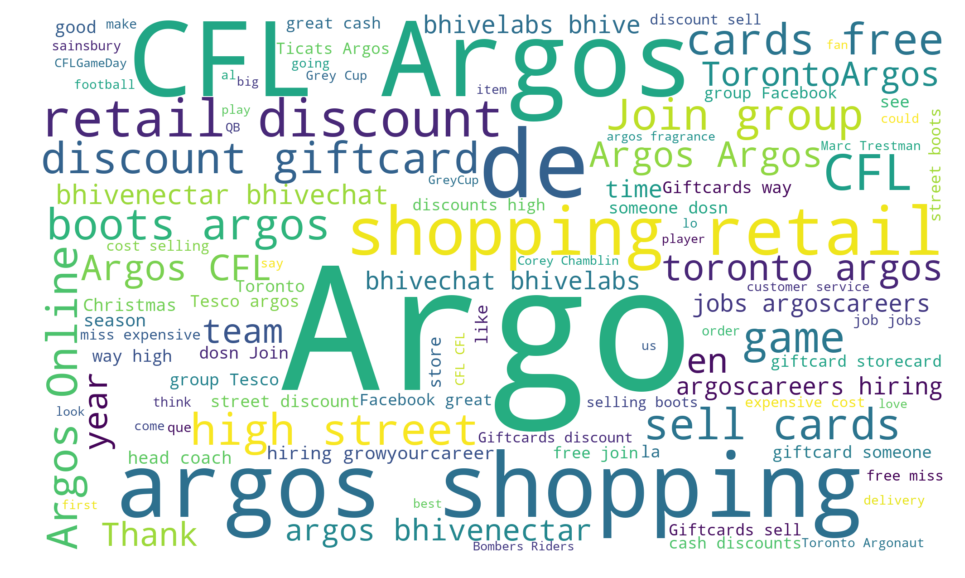

In [18]:
#wc.recolor(color_func = grey_color_func)
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

#### Have a look at the number of tweets excluding lduk promotion

In [20]:
with open('argos_com.txt','r',encoding='utf-8') as f:
    argos_com=f.readlines()
# clean each review
argos_clean=[]
for review in argos:
    reivew=re.sub("(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]", "", review)
    review=re.sub('[^A-Za-z]',' ',review)
    argos_clean.append(review)
argos_clean=[review for review in argos_clean if review.strip()!='']

Count all tweets (after cleaning and excluding empty string) -- 4814

In [21]:
count_all=0
for i in argos_clean:
    count_all+=1
count_all

4887

Count tweets without promotion tweets --3502

In [22]:
count_cus=0
for review in argos_clean:
    if 'lduk' not in review:
        count_cus+=1
count_cus

3558

Therefore, only 73% of tweets are from customers

# Step 3: Sentiment Analysis

In [46]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [47]:
import re

In [48]:
with open('argos_com.txt','r',encoding='utf-8') as f:
    argos_com=f.readlines()

In [49]:
# clean each review
argos_clean=[]
for review in argos:
    reivew=re.sub("(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]", "", review)
    review=re.sub('[^A-Za-z]',' ',review)
    argos_clean.append(review)
argos_clean=[review for review in argos_clean if review.strip()!='']

In [50]:
# remove promotion (lduk), only keep customer reviews
argos_clean=[review for review in argos_clean if 'lduk' not in review]

In [51]:
# Create a sentiment intensity analyzer object:
sid = SIA()
total_count=0
neg_count=0
pos_count=0
neu_count=0

neg_review=[]
pos_review=[]
neu_review=[]

# Loop the sentences
for review in argos_clean:
    ss = sid.polarity_scores(review) 
    #print(ss)
    total_count+=1
    if ss['compound'] < 0:
        neg_count+=1
        neg_review.append(review)
        #print(sentence, ' is overall negative ', ss['compound'])
    elif ss['compound'] == 0:
        neu_count+=1
        neu_review.append(review)
        #print(sentence, ' is overall neutral')
    else:
        pos_count+=1
        pos_review.append(review)
        #print(sentence, ' is overall positive ', ss['compound'])

Calculate the proportion of different reviews

In [52]:
print('total_count',total_count,'\n','neg_count',neg_count,'\n','pos_count',pos_count,'\n','neu_count',neu_count)

total_count 3558 
 neg_count 779 
 pos_count 1369 
 neu_count 1410


### Analyze the frequency of positive and negative tweets

In [60]:
# Change everything to lowercase
neg_review = [review.lower() for review in neg_review]
pos_review = [review.lower() for review in pos_review]


In [62]:
neg_review

[' teamknowhowuk is anybody going to have the decency to speak to me tonight re yr  nd cock up and my  nd complaint or how else will i know what is happening at  am tomorrow  absolute disgrace  currys ',
 ' currys       off samsung american style fridge freezers     promocode    http   realpromocodes com currys    off samsung american style fridge freezers    ',
 'thanks stuart   talk about  currys staff being  incompetent  i fixed the problem myself and have now ordered on line with zero assistance    bluelightcard are absolutely right   curryspcworld we re wrong  online in store and customer services   i despair  ',
 'bored with the same old steak   ',
 ' teamknowhowuk  curryspcworld  cpwtweets just wasted   hours getting to currys junction   to get an iphone battery only to be told they don t do it     sort your website out   teamknowhow  currys  carphonewarehouse  wasteoftime ',
 ' curryspcworld  cpwtweets just wasted   hours getting to currys junction   to get an iphone battery on

In [61]:
# create a stopword list for this
stopword=["I","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you",
           "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
           "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
           "their", "theirs", "themselves", "what", "which", "who", "whom", "this",
           "that", "these", "those", "am", "is", "are", "was", "were", "be", "been",
           "being", "have", "has", "had", "having", "do", "does", "did", "doing", 
           "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
           "of", "at", "by", "for", "with", "about", "against", "between", "into",
           "through", "during", "before", "after", "above", "below", "to", "from",
           "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", 
           "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
           "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
           "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
           "will", "just", "don", "should", "now","via","smart","get","black","entertainment","ireland","london","england",
              "scotland","wales","londonislovinit","one","gb","marked","white","new","today","bundle","still","day","back",
              "selected","logik","told","uk","home","ve","core","even","would","half","got","gold",
              "win","warriors","take","red","go","month","know","lg","jvc","ever","bought","extra",
              "tb","built","range","data","re","last","rt","need","stephen","night","want",
         "www","http","https"]
    

In [55]:
# create tokens and bigrams for review
# for negative reviews
tokens_neg=[]
bigrams_neg=[]
for review in neg_review:
    token=nltk.word_tokenize(review)
    filtered_words = [word for word in token if word not in stopword and len(word)>1]
    tokens_neg=tokens_neg+filtered_words

bigrams_neg=list(nltk.bigrams(tokens_neg))
  
# for positive reviews
tokens_pos=[]
bigrams_pos=[]
for review in pos_review:
    token=nltk.word_tokenize(review)
    filtered_words = [word for word in token if word not in stopword and len(word)>1]
    tokens_pos=tokens_pos+filtered_words

bigrams_pos=list(nltk.bigrams(tokens_pos))

In [56]:
# get frequent words and bigrams
freq_words_neg=nltk.FreqDist(tokens_neg)
freq_bigrams_neg=nltk.FreqDist(bigrams_neg)
freq_words_pos=nltk.FreqDist(tokens_pos)
freq_bigrams_pos=nltk.FreqDist(bigrams_pos)

In [57]:
# most common words for negative reviews
common_words_neg=freq_words_neg.most_common(20)
print(common_words_neg)

[('currys', 743), ('curryspcworld', 247), ('service', 216), ('customer', 129), ('pcworld', 111), ('delivery', 101), ('teamknowhowuk', 100), ('fridge', 78), ('call', 60), ('store', 58), ('order', 53), ('tv', 52), ('phone', 51), ('time', 51), ('waiting', 48), ('poor', 44), ('price', 42), ('pc', 41), ('days', 39), ('com', 38)]


In [20]:
# most common bigrams for negative reviews
common_bigrams_neg=freq_bigrams_neg.most_common(20)
print(common_bigrams_neg)

[(('pc', 'world'), 123), (('currys', 'pc'), 119), (('customer', 'service'), 101), (('currys', 'pcworld'), 81), (('service', 'currys'), 46), (('latestdeals', 'co'), 46), (('co', 'deals'), 46), (('lduk', 'latestdealsuk'), 46), (('world', 'latestdeals'), 44), (('world', 'lduk'), 44), (('currys', 'curryspcworld'), 38), (('fridge', 'freezers'), 34), (('washing', 'machine'), 27), (('pcworld', 'currys'), 27), (('american', 'style'), 26), (('style', 'fridge'), 25), (('currys', 'currys'), 22), (('fridge', 'freezer'), 20), (('poor', 'service'), 18), (('curryspcworld', 'teamknowhowuk'), 16)]


In [21]:
# most common words for positive reviews
common_words_pos=freq_words_pos.most_common(20)
print(common_words_pos)

[('currys', 2881), ('pc', 1621), ('world', 1402), ('co', 849), ('deals', 645), ('latestdeals', 582), ('lduk', 582), ('latestdealsuk', 582), ('tv', 582), ('free', 532), ('curryspcworld', 348), ('pcworld', 325), ('hd', 281), ('delivery', 273), ('save', 261), ('cameras', 260), ('led', 242), ('appliances', 242), ('kitchen', 238), ('ultra', 236)]


In [22]:
# most common bigrams for positive reviews
common_bigrams_pos=freq_bigrams_pos.most_common(20)
print(common_bigrams_pos)

[(('pc', 'world'), 1393), (('currys', 'pc'), 1384), (('latestdeals', 'co'), 582), (('co', 'deals'), 582), (('lduk', 'latestdealsuk'), 582), (('world', 'lduk'), 548), (('world', 'latestdeals'), 545), (('currys', 'pcworld'), 295), (('led', 'tv'), 238), (('curryspcworld', 'currys'), 234), (('ultra', 'hd'), 230), (('free', 'delivery'), 230), (('currys', 'co'), 230), (('co', 'gbuk'), 230), (('kitchen', 'appliances'), 229), (('html', 'awc'), 225), (('srcid', 'xtor'), 225), (('xtor', 'al'), 225), (('al', 'cmpid'), 225), (('cmpid', 'aff'), 225)]


### Create wordcloud for negative reviews

In [58]:
from wordcloud import WordCloud

In [59]:
neg_tweets=''
for review in neg_review:
    neg_tweets=neg_tweets+' '+review
neg_tweets

'  teamknowhowuk is anybody going to have the decency to speak to me tonight re yr  nd cock up and my  nd complaint or how else will i know what is happening at  am tomorrow  absolute disgrace  currys   currys       off samsung american style fridge freezers     promocode    http   realpromocodes com currys    off samsung american style fridge freezers     thanks stuart   talk about  currys staff being  incompetent  i fixed the problem myself and have now ordered on line with zero assistance    bluelightcard are absolutely right   curryspcworld we re wrong  online in store and customer services   i despair   bored with the same old steak     teamknowhowuk  curryspcworld  cpwtweets just wasted   hours getting to currys junction   to get an iphone battery only to be told they don t do it     sort your website out   teamknowhow  currys  carphonewarehouse  wasteoftime   curryspcworld  cpwtweets just wasted   hours getting to currys junction   to get an iphone battery only to be told they d

In [32]:
stopword_cloud=stopword+['currys','curryspcworld','pc','world','teamknowhowuk','pcworld','teamknowhow']

NameError: name 'stopword' is not defined

In [33]:
#bg_pic = imread('uk.png')
wc = WordCloud( width=2000, height=1200, margin=2,background_color="white", max_words=100, 
               stopwords=stopword_cloud)
wc.generate(neg_tweets)

ValueError: We need at least 1 word to plot a word cloud, got 0.

(-0.5, 1999.5, 1199.5, -0.5)

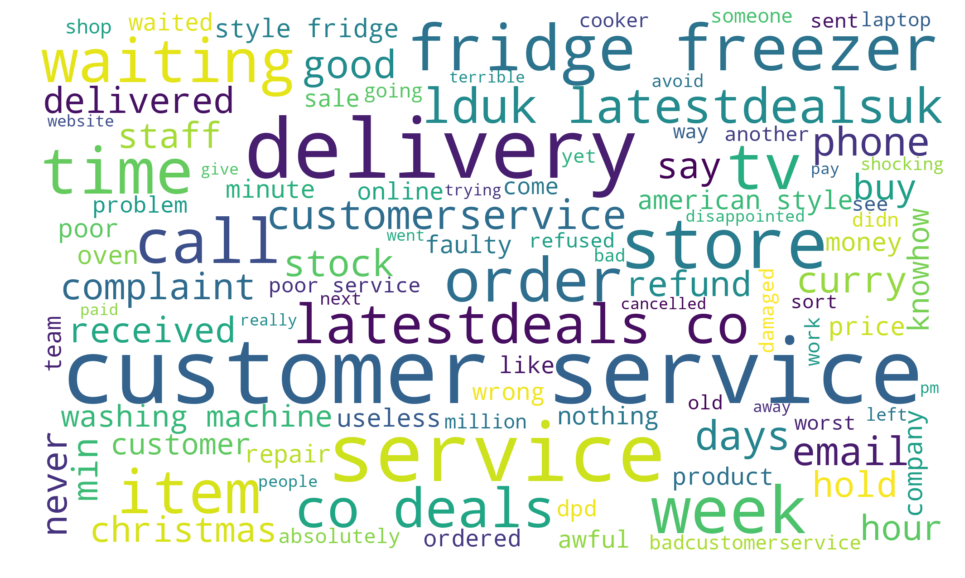

In [40]:
#wc.recolor(color_func = grey_color_func)
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Step 4: Topic Modelling 

### If we want to model all reviews:

In [4]:
# treat the text as list for different reviews
with open('currys.txt','r',encoding='utf-8') as f:
    currys=f.readlines()

In [93]:
# clean each review
currys_clean=[]
for review in currys:
    reivew=re.sub("(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]", "", review)
    review=re.sub('[^A-Za-z]',' ',review)
    currys_clean.append(review)
currys_clean=[review for review in currys_clean if review.strip()!='']

### If we only focus on negative reviews:

In [89]:
currys_clean=neg_review
currys_clean

[' teamknowhowuk is anybody going to have the decency to speak to me tonight re yr  nd cock up and my  nd complaint or how else will i know what is happening at  am tomorrow  absolute disgrace  currys ',
 ' currys       off samsung american style fridge freezers     promocode    http   realpromocodes com currys    off samsung american style fridge freezers    ',
 'thanks stuart   talk about  currys staff being  incompetent  i fixed the problem myself and have now ordered on line with zero assistance    bluelightcard are absolutely right   curryspcworld we re wrong  online in store and customer services   i despair  ',
 'bored with the same old steak   ',
 ' teamknowhowuk  curryspcworld  cpwtweets just wasted   hours getting to currys junction   to get an iphone battery only to be told they don t do it     sort your website out   teamknowhow  currys  carphonewarehouse  wasteoftime ',
 ' curryspcworld  cpwtweets just wasted   hours getting to currys junction   to get an iphone battery on

In [90]:
# create stopwords for topic modelling, keep updating according to output 
# (compared to stopwords for frequency analysis, this list adds a lot of adjectives)
stopword_basic=['few', 'want', 'be', 'itself', 'we', 'here', 'so', 'wha', 'their', 'let',
            'yer', 'they', 'have', 'iep', 'didn', 'should', 'yay', 'his', 'I', 'doing',
            'or', 'only', 'an', 'same', 'going', 'yourselves', 'above', 'some', 'thank',
            'will', 'against', 'off', 'having', 'very', 'thanks', 'than', 'and', 'under',
            'more', 'with', 'no', 'get', 'when', 'ours', 'other', 't', 'most', 'my',
            'awesome', 'being', 'once', 'know', 'use', 'if', 'herself', 'like', 'nice', 
            'during', 'don', 'hey', 'down', 'its', 'of', 's', 'there', 'nzdt', 'our', 'was',
            'not', 'too', 'say', 'themselves', 'him', 'could', 'who', 'while', 'just', 'com',
            'ourselves', 'myself', 'yep', 'those', 'top', 'been', 'in', 'that', 'a', 'yours',
            'this', 'wow', 'new', 'the', 'par', 'theirs', 'am', 'amp', 'aest', 'does', 'what',
            'into', 'make', 'is', 'it', 'them', 'such', 'were', 'can', 'why', 'yourself', 'best',
            'after', 'are', 'pln', 'where', 'at', 'pst', 'hoo', 'which', 'got', 'before', 'hers', 
            'nor', 'then', 'own', 'how', 'further', 'hmm', 'had', 'but', 'as', 'he', 'to', 'her',
            'between', 'one', 'me', 'about', 'each', 'whom', 'your', 'by', 'pdt', 'out', 'via',
            'below', 'hop', 'ooo', 'because', 'through', 'yes', 'did', 'you', 'has', 'really', 
            'see', 'until', 'would', 'from', 'again', 'these', 'all', 'himself', 'great', 'i',
            'both', 'now', 'up', 'for', 'good', 'on', 'she', 'over', 'do', 'any','via','late']
stopword_update=['currys','curryspcworld','pc','world','teamknowhowuk','pcworld','teamknowhow','www','http','https',
                'today','american','ve','day','told','buy','pay','company','knowhow','gb','news','mm','store',
                'order','yesterday','money','useless','received']
stopword_topic=stopword_basic+stopword_update

In [91]:
# tokenize, remove stopwords and words with one letter
tokens=[]
for review in currys_clean:
    token = nltk.word_tokenize(review)
    filtered_words = [word for word in token if word not in stopword_topic and len(word)>1]
    tokens.append(filtered_words)

In [92]:
# Remove words that only occur once to reduce computation later
from collections import defaultdict
token_frequency = defaultdict(int)

# count all token
for review in tokens:
    for word in review:
        token_frequency[word] += 1

# keep words that occur more than once
tokens = [ [word for word in review if token_frequency[word] > 1]
                for review in tokens  ]


Combine cleaned tokens into tweets, as TfidfVectorizer only deals with string

In [93]:
tweets=[]
for review in tokens:
    if review!=[]:
        tweet=''
        for word in review:
            tweet=tweet+' '+word
    tweets.append(tweet)

create vector matrix

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [48]:
# restrict the dimentionality of features
n_features = 1000

In [94]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                )
tf = tf_vectorizer.fit_transform(tweets)

Train LDA models

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

In [98]:
# decide number of topics
n_topics = 5
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [99]:
# train the data. There will be warnings but just ignore them.
lda.fit(tf)

C:\Users\xueli\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Show the top key words for each topic

In [53]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [54]:
# the number of words to show
n_top_words = 10

In [55]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
currys christmas advert curry lens camera tv mm nikon dx
Topic #1:
xbox currys pc bundle world dead deals forza red fallout
Topic #2:
currys pc world uk https www deals latestdeals lduk latestdealsuk
Topic #3:
http ph apple spam forget morning coming scale consumers vote
Topic #4:
currys pcworld curryspcworld service stock store told laptop time buy
Topic #5:
utm microsoft source share https spam www twitter switch ig
Topic #6:
day lied jan delivered paid nxt blackfriday come told waited
Topic #7:
old appliance dec bored steak dishwasher grundig bought parts ruined
Topic #8:
pressure pro digital king multicooker chrome year samsung breaking informed
Topic #9:
currys service curryspcworld customer delivery teamknowhowuk fridge order waiting freezers



Visualize the output.The graph is interactive.

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

In [100]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.153929 -0.035401       1        1  48.619718
2     -0.135171 -0.144087       2        1  22.956695
0      0.052374  0.157497       3        1  10.464249
1     -0.009060  0.151382       4        1   9.722407
3      0.245787 -0.129392       5        1   8.236931, topic_info=    Category        Freq            Term       Total  loglift  logprob
749  Default  184.000000         service  184.000000  30.0000  30.0000
406  Default   71.000000          fridge   71.000000  29.0000  29.0000
403  Default   36.000000        freezers   36.000000  28.0000  28.0000
636  Default   44.000000           price   44.000000  27.0000  27.0000
542  Default   29.000000          marked   29.000000  26.0000  26.0000
242  Default  109.000000        customer  109.000000  25.0000  25.0000
903  Default   32.000000              uk   32.000000  24.0000  24.0000
336  Default   31.000000           email   31.000000  23.0000  23.0000
820  Default   23.000000           style   23.000000  22.0000  22.0000
182  Default   22.000000            code   22.000000  21.0000  21.0000
299  Default   22.000000        discount   22.000000  20.0000  20.0000
554  Default   41.000000       microsoft   41.000000  19.0000  19.0000
788  Default   29.000000            spam   29.000000  18.0000  18.0000
506  Default   33.000000          laptop   33.000000  17.0000  17.0000
953  Default   28.000000          wasted   28.000000  16.0000  16.0000
228  Default   14.000000            crap   14.000000  15.0000  15.0000
261  Default   14.000000              db   14.000000  14.0000  14.0000
652  Default   13.000000              ps   13.000000  13.0000  13.0000
922  Default   12.000000             usa   12.000000  12.0000  12.0000
402  Default   22.000000         freezer   22.000000  11.0000  11.0000
281  Default  100.000000        delivery  100.000000  10.0000  10.0000
637  Default   11.000000          priced   11.000000   9.0000   9.0000
614  Default   24.000000          people   24.000000   8.0000   8.0000
937  Default   40.000000         waiting   40.000000   7.0000   7.0000
870  Default   11.000000         tinyurl   11.000000   6.0000   6.0000
671  Default   11.000000             ref   11.000000   5.0000   5.0000
477  Default   11.000000      incredibly   11.000000   4.0000   4.0000
887  Default   26.000000          trying   26.000000   3.0000   3.0000
363  Default   11.000000       expensive   11.000000   2.0000   2.0000
309  Default   14.000000          dixons   14.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
665   Topic5    7.686504  realpromocodes    8.424552   2.4049  -4.2813
647   Topic5    7.686513       promocode    8.424585   2.4049  -4.2813
363   Topic5   10.367506       expensive   11.853078   2.3626  -3.9821
741   Topic5    4.432134        selected    5.170191   2.3425  -4.8319
8     Topic5    3.371784        accounts    4.110116   2.2985  -5.1053
660   Topic5    2.875326           range    3.613382   2.2681  -5.2646
621   Topic5    2.796872           place    3.541413   2.2605  -5.2923
216   Topic5    2.312060         cookers    3.050132   2.2195  -5.4826
805   Topic5    2.246566           steel    2.984629   2.2125  -5.5114
636   Topic5   32.690147           price   44.177235   2.1954  -2.8337
211   Topic5    1.707821       consumers    2.459510   2.1318  -5.7855
96    Topic5    1.235877    bestoflondon    1.973930   2.0283  -6.1090
230   Topic5    1.235523      creditcard    1.974123   2.0279  -6.1093
396   Topic5    1.233203            fone    1.975422   2.0254  -6.1111
187   Topic5    1.218696         colours    1.957487   2.0227  -6.1230
766   Topic5    1.218083           shops    1.957818   2.0220  -6.1235
162   Topic5    1.202652        changing    1.940740   2.0180  -6.1362
117   Topic5    1.200941         bounced    1.942392   2.0157  -6.1376
125   Topic5    1.192343     

To build and interpret this model:  
1) decide topic numbers  
2) list the complete reviews in terms of tokens in order to understand the reasons behind (as the code below)

In [104]:
count=0
for tweet in neg_review:
    if 'data' in tweet:
        count+=1
        print('--------')
        print(tweet)
print('\n','total number:',count)

--------
 currys pc world has apologised after they found    million of their customers may have had their personal  data accessed by  hackers  https   www getusecure com post currys pc world issues steps to avoid fraud after data breach     
--------
 currys  pcworld  dixons  breach in       trickled out announcememts that     million  then     million  then    million    customers   data stolen  
--------
   inadequately protect customer personal confidential data and not recognise their security failure  
--------
 we take the security of your data extremely seriously and have previously announced that we have taken action to close off this access and have no evidence it is continuing   
--------
after being bullied into handing over personal data for the purposes of extended warranties et cetera by  currys  pcworld  and now they ve lost all the data  does anyone fancy joining me in class action lawsuit proceedings  please contact me by september   th  
--------
is there no company 